In [1]:
import pandas as pd

In [2]:
reg = pd.read_csv("../../data/Registered_Voter_List.csv")

/var/folders/ym/cg59ddhx7jl408c4hs61x_wm0000gp/T/ipykernel_70993/1683269546.py:1: DtypeWarning: Columns (18,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  reg = pd.read_csv("../../data/Registered_Voter_List.csv")


In [3]:
reg["SUSIND"] = reg["SUSIND"].fillna("Not suspense")

In [4]:
# current
cur = reg.groupby("SUSIND")["VUIDNO"].count().to_dict()
total = reg.groupby("SUSIND")["VUIDNO"].count().sum()
print(cur["Not suspense"]/total)
print(total - cur["Not suspense"])
print(total)

0.8482978677299124
140015
922960


In [5]:
import geopandas as gpd

In [6]:
pcts = gpd.read_file("../../data/precincts_march24.geojson")

In [7]:
pcts["Precinct"] = pcts["Precinct"].astype(int)
pcts = pcts.merge(reg, how="left", left_on="Precinct", right_index=True)

In [10]:
reg["MCHGDT"] = pd.to_datetime(reg["MCHGDT"])

In [11]:
reg["reg_last_yr"] = reg["MCHGDT"] >= "2024-01-01"

In [12]:
last_yr = reg.pivot_table(index=["PCTCOD"], columns="reg_last_yr", values="VUIDNO", aggfunc="count")
last_yr["pct_last_yr"] = last_yr[True]/(last_yr[False]+last_yr[True])

In [13]:
pcts = pcts.merge(last_yr, left_on="Precinct", right_on="PCTCOD", how="left")

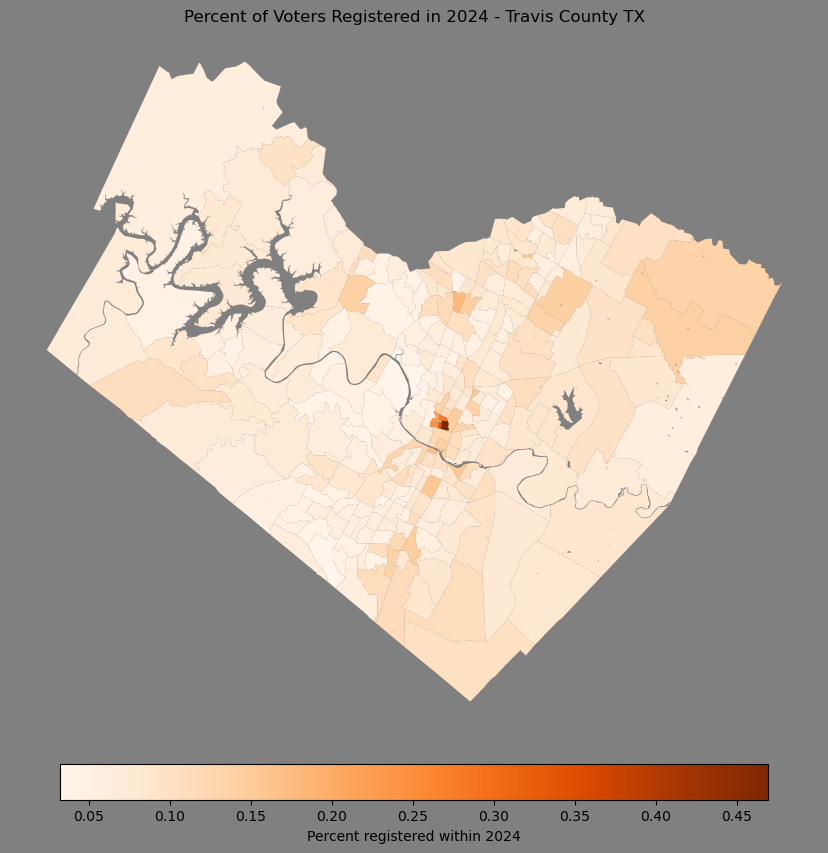

In [14]:
import matplotlib.pyplot as plt

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10), facecolor='grey')
pct_plot = pcts.plot("pct_last_yr", ax=ax, cmap="Oranges")


# Customize the legend (colorbar)
cbar = plt.colorbar(pct_plot.collections[0], ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)
cbar.set_label('Percent registered within 2024')

# Turn off x and y axes
ax.set_axis_off()
plt.title('Percent of Voters Registered in 2024 - Travis County TX')
plt.savefig("pct_newly_registered_by_pct.png", bbox_inches='tight', dpi=300)